# **Proyecto 1: Análisis estadístico**

### Andres Banquez Cabarcas

### Melina Villada López

### **Objetivos proyecto**

* Fortalecer las competencias en programación para el análisis de datos
* Discutir resultados a partir de gráficos y estadística descriptiva
* Evaluar el impacto de la extracción de características de señales para encontrar patrones diferenciales en datos de poblaciones clínicas
* Proponer nuevas estrategias de análisis de información fisiológica para el diseño de ayudas diagnósticas

### **Requerimientos**


**Contexto**

*• Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades (5%).*


**Enfermedad de Parkinson**

*Diagnóstico:*

1. Evaluación Clínica: El diagnóstico de Parkinson se basa principalmente en la evaluación clínica de los síntomas motores, como temblores en reposo, rigidez muscular, bradicinesia (lentitud de movimientos) y inestabilidad postural.
2. Historial Médico: Se revisa el historial médico del paciente para descartar otras condiciones que puedan causar síntomas similares.
3. Pruebas de Imagen: Las pruebas como la tomografía por emisión de positrones (PET) o la tomografía computarizada por emisión de fotón único (SPECT) pueden ayudar, pero no son definitivas para el diagnóstico.
4. Respuesta a la Medicación: La respuesta positiva a la levodopa (un medicamento usado en el tratamiento del Parkinson) puede apoyar el diagnóstico.

*Reto del Diagnóstico Temprano:*

* Síntomas Iniciales: Los síntomas iniciales pueden ser sutiles y se confunden fácilmente con el envejecimiento normal o con otros trastornos.
* No hay Marcadores Biológicos: No existe un marcador biológico definitivo que confirme el diagnóstico en las etapas tempranas[1].

**Enfermedad de Huntington**

*Diagnóstico:*

1. Evaluación Clínica: Se observa la presencia de movimientos involuntarios (corea), problemas cognitivos y cambios en el comportamiento.
2. Historial Familiar: Dado que la enfermedad de Huntington es genética, el historial familiar de la enfermedad es un factor clave.
3. Pruebas Genéticas: Un análisis de sangre puede identificar la mutación en el gen HTT que causa la enfermedad.

*Reto del Diagnóstico Temprano:*

* Síntomas Psicológicos y Cognitivos: Los síntomas cognitivos y psiquiátricos pueden preceder a los síntomas motores, lo que dificulta un diagnóstico temprano basado en la observación clínica.
*Estigma y Temor: El diagnóstico genético puede llevar a dilemas éticos y emocionales para los individuos y sus familias[2].

**Esclerosis Lateral Amiotrófica (ELA)**

*Diagnóstico:*

1. Evaluación Clínica: El diagnóstico se basa en la observación de la debilidad muscular progresiva, fasciculaciones (contracciones musculares involuntarias), y atrofia muscular.
2. Electromiografía (EMG): La EMG mide la actividad eléctrica de los músculos y puede mostrar signos de denervación y reinervación.
3. Imágenes por Resonancia Magnética (MRI): Utilizadas para descartar otras condiciones.
4. Pruebas de Conducción Nerviosa: Evaluan la función de los nervios y pueden ayudar a excluir neuropatías periféricas.

*Reto del Diagnóstico Temprano:*

* Variabilidad de Síntomas: Los síntomas pueden variar ampliamente entre los pacientes y progresar a diferentes velocidades, lo que complica el diagnóstico.
* Falta de Biomarcadores Específicos: No hay pruebas de laboratorio específicas para confirmar el diagnóstico de ELA en sus primeras etapas.

*• Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy (5%)*



La rutina detrend de SciPy se utiliza para eliminar la tendencia lineal de una señal. Esta operación es común en el procesamiento de señales y en el análisis de series temporales para enfocarse en las fluctuaciones alrededor de una tendencia media.

Suponemos que la serie temporal es una combinación aditiva de una tendencia y otros componentes.

Y(t)=a(t)+b(t)+e(t)

* Y(t) es la serie temporal original

* a(t) es la tendencia

* b(t) es el componente estacional

* e(t) es el ruido

Por lo tanto, para eliminar la tendencia de una serie temporal, se debe estimar el componente de tendencia y luego restarlo de los datos originales, lo que nos deja solo con el componente estacional y el ruido.

Para encontrar T(t) y  S(t), utilizamos la regresión lineal, que minimiza el error cuadrático medio entre los valores de la señal  y(t) y los valores predichos por la tendencia lineal  at+b.

La fórmula general para la regresión lineal simple (en una dimensión) es:

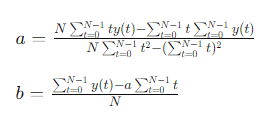

Una vez que hemos encontrado a y b, podemos calcular la señal sin tendencia (detrended signal) restando la tendencia lineal de la señal original:

𝑟(𝑡)=𝑦(𝑡)−(𝑎𝑡+𝑏)
[4]


*• Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel (5%)*

El filtro Hampel es una técnica robusta de procesamiento de señales que se utiliza para identificar y reemplazar valores atípicos en una serie temporal. A diferencia de otros métodos de filtrado, el filtro Hampel es particularmente efectivo para manejar datos con ruido y valores atípicos, ya que se basa en la mediana y la desviación absoluta de la mediana (MAD).

Conceptos Clave

* Ventana de Análisis (Window): El filtro opera en una ventana deslizante de tamaño 2k+1, donde  k es el número de puntos a la izquierda y a la derecha del punto central en la ventana.

* Mediana (Median): La mediana es una medida robusta de tendencia central que no se ve afectada por valores atípicos.

* Desviación Absoluta de la Mediana (MAD): La MAD es una medida robusta de dispersión que se define como la mediana de los valores absolutos de las desviaciones respecto a la mediana.

Dado un conjunto de datos 

1. Calcular la Mediana Local: Para cada punto 𝑥𝑖 en la serie temporal, considere una ventana de tamaño 2𝑘+1 centrada en 𝑥𝑖. La mediana local Med (𝑥𝑖) se calcula como:



2.Calcular la MAD Local: La MAD local  MAD(𝑥𝑖)  se calcula como:

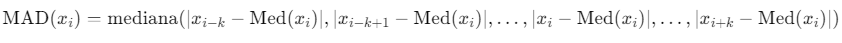

3. Identificación de Valores Atípicos: Un punto 𝑥𝑖 se considera un valor atípico si la diferencia entre 𝑥𝑖 y la mediana local Med (𝑥𝑖) es mayor que un umbral determinado. El umbral se define típicamente como:

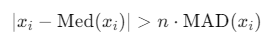

donde n es un factor de escala (por ejemplo, n=3).

4. Reemplazo de Valores Atípicos: Si 𝑥𝑖 es un valor atípico, se reemplaza con la mediana local Med(𝑥𝑖): 
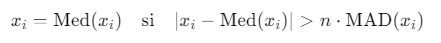 [5]

*• Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) (5%)*


La entropía de permutación (PE) es una herramienta robusta de series temporales que proporciona una medida de cuantificación de la complejidad de un sistema dinámico al capturar las relaciones de orden entre los valores de una serie temporal y extraer una distribución de probabilidad de los patrones ordinales.

* No es paramétrico y está libre de supuestos restrictivos de modelos paramétricos.
* Es robusto con respecto al ruido, computacionalmente eficiente, flexible e invariante con respecto a las transformaciones monótonas no lineales de los datos.
* Se basa en las nociones de entropía y dinámica simbólica.
* Da cuenta de la estructura de ordenamiento temporal (causalidad temporal) de una serie temporal dada de valores reales.
* Permite al usuario desbloquear el contenido dinámico complejo de las series temporales no lineales.

A diferencia de las rutinas mencionadas anteriormente, esta no modifica en si la señal, en cambio, entrega un valor que habla sobre que tan determinista y regular, o en su defecto, aleatorio y ruidosa puede ser una señal a analizar. Dicho de otra manera

El primer paso es dividir la serie temporal unidimensional en una matriz de vectores de columnas superpuestos. Esta división utiliza dos hiperparámetros:

T (tao): El retraso de tiempo de incrustación que controla el número de períodos de tiempo entre elementos de cada uno de los nuevos vectores de columna. Se recomienda un valor de 1

D : La dimensión de incrustación que controla la longitud de cada uno de los nuevos vectores de columna. Se recomienda un valor entre 3<=D<=7.

## **Programación**

### 1. Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [56]:
# Importando las librerias
import pandas as pd
import numpy as np
import os
from scipy.io import loadmat
from scipy.signal import detrend
from scipy.special import factorial
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo .ts
archivo_ts = r'ELA\als8.ts'
datos = pd.read_csv(archivo_ts, sep='\t', header=None)

# Extraer las primeras 5 columnas
columnas_extraidas = datos.iloc[:, 1:5]
tiempos = datos.iloc[:, 0]
detrended_columns = detrend(columnas_extraidas, axis=0)

# Convertir a ndarray
ndarray_resultante = detrended_columns

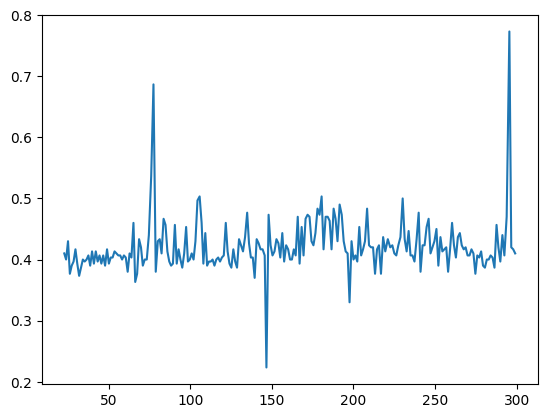

In [3]:
plt.plot(tiempos, datos.iloc[:, 3])

### 2. Para cada señal eliminar los errores en tendencia usando la rutina detrend.

In [4]:
columnas_detrend = columnas_extraidas.apply(detrend, axis=0)
print(columnas_detrend)

            1         2         3         4
0   -0.005590  0.014835  0.000462  0.005144
1   -0.029362 -0.018939 -0.009635  0.018470
2    0.020267 -0.025913  0.020268  0.008396
3   -0.020104  0.010312 -0.033130  0.008323
4   -0.023775 -0.013362 -0.019927  0.004849
..        ...       ...       ...       ...
227  0.170131  0.056463  0.038345 -0.014857
228  0.416359  0.339489  0.341547  0.081769
229 -0.084012  0.095714 -0.011850 -0.038304
230 -0.027683 -0.027960 -0.015248 -0.045078
231 -0.044754 -0.025034 -0.022045 -0.041851

[232 rows x 4 columns]


In [5]:
columnas_procesadas = []

In [6]:
# Funcion para extraer la información
def dataExtractor(folder_path: str) -> list[pd.DataFrame]:
    '''
    Extrae las primeras 5 señales como señales de interes para cada archivo .ts de una carpeta dada
    Además de extraerlas, sin sus 20 segundos iniciales, realiza un detrend en todas las columnas
    de interés excepto la columna 0 ya que esta es únicamente el tiempo transcurrido.
    
    Retorna una lista de dataframes.
    '''
    dataE = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.ts'):
            file_path = os.path.join(folder_path, filename)
            data = pd.read_csv(file_path, sep='\s+', header=None)
            senalesinteres = data.iloc[:, [1, 2, 3, 4]]
            detrended_columns = detrend(senalesinteres, axis=0)
            detrended_columns = pd.concat([data.iloc[:, 0],pd.DataFrame(detrended_columns, columns=[1, 2, 3, 4])], axis=1)
            dataE.append(detrended_columns)
    return dataE

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1963521780.py:14: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+', header=None)


#### **Extracción inicial de datos**

In [7]:
folder_path = r'Control'

control_data = dataExtractor(folder_path)

print(len(control_data))


16


In [8]:
folder_path = r'Parkinson'

parkinson_data = dataExtractor(folder_path)

print(len(parkinson_data))

15


In [9]:
folder_path = r'Huntington'

hun_data = dataExtractor(folder_path)

print(len(hun_data))

18


In [10]:
folder_path = r'ELA'

ela_data = dataExtractor(folder_path)

print(len(ela_data))

13


### 3. Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel

In [11]:
def hampelfilter(wk: np.ndarray, K, FilterParms: list[int]) -> np.ndarray:
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    print("changing");
    numero = np.sum((TestVal > Thresh * MAD)==True)
    print(numero)

    yk[TestVal > Thresh * MAD] = ref


    return yk

In [12]:
def hampelFilter(archivos_ts: list[pd.DataFrame]) -> list[pd.DataFrame]:
    '''
        De los archivos anteriormente extraidos se extraerán las señales y se les
        realizara una rutina hampel para quitar los datos atipicos, posteriormente 
        se retornara una lista con las columnas ya filtradas.
    '''
    archivos_procesados = []
    for columnas_extraidas in archivos_ts:
        columnas_procesadas = []
        for i in range(columnas_extraidas.shape[1]):
            if i == 0:
                columnas_procesadas.append(columnas_extraidas[i])
                continue # Nuevamente ignoraremos el tiempo.
            columna_filtrada = hampelfilter(columnas_extraidas[i], 3, [6])
            columnas_procesadas.append(columna_filtrada)
        columnas_procesadas = pd.DataFrame(list(zip(*columnas_procesadas)), columns = ['Elapsed Time (sec)',
                                                                                       'Left Stride Interval (sec)',
                                                                                       'Right Stride Interval (sec)',
                                                                                       'Left Swing Interval (sec)',
                                                                                       'Right Swing Interval (sec)'])
        archivos_procesados.append(columnas_procesadas)
    return archivos_procesados

#### **Ejecución del filtro hampel**

In [13]:
control_data_f = hampelFilter(control_data)

changing
1
changing
2
changing
0
changing
2
changing
5
changing
6
changing
2
changing
3
changing
2
changing
2
changing
2
changing
2
changing
4
changing
6
changing
1
changing
2
changing
1
changing
1
changing
0
changing
2
changing
4
changing
4
changing
3
changing
1
changing
4
changing
3
changing
3
changing
3
changing
7
changing
9
changing
3
changing
3
changing
8
changing
6
changing
1
changing
4
changing
3
changing
2
changing
2
changing
5
changing
3
changing
1
changing
5
changing
5
changing
6
changing
11
changing
5
changing
5
changing
0
changing
0
changing
0
changing
0
changing
7
changing
5
changing
0
changing
6
changing
7
changing
6
changing
2
changing
4
changing
5
changing
4
changing
0
changing
1


In [14]:
ela_data_f = hampelFilter(ela_data)

changing
3
changing
2
changing
3
changing
2
changing
1
changing
2
changing
0
changing
1
changing
5
changing
4
changing
5
changing
3
changing
3
changing
3
changing
1
changing
1
changing
2
changing
3
changing
1
changing
4
changing
0
changing
0
changing
0
changing
0
changing
3
changing
3
changing
0
changing
0
changing
3
changing
3
changing
0
changing
1
changing
9
changing
6
changing
4
changing
27
changing
1
changing
1
changing
1
changing
0
changing
0
changing
0
changing
0
changing
0
changing
4
changing
4
changing
4
changing
3
changing
0
changing
3
changing
0
changing
1


In [15]:
hun_data_f = hampelFilter(hun_data)

changing
1
changing
1
changing
1
changing
1
changing
0
changing
1
changing
0
changing
2
changing
2
changing
1
changing
0
changing
0
changing
1
changing
1
changing
0
changing
1
changing
0
changing
0
changing
0
changing
0
changing
3
changing
1
changing
3
changing
1
changing
2
changing
3
changing
0
changing
1
changing
3
changing
1
changing
0
changing
1
changing
0
changing
0
changing
0
changing
0
changing
1
changing
0
changing
0
changing
0
changing
2
changing
0
changing
1
changing
4
changing
0
changing
0
changing
0
changing
0
changing
0
changing
0
changing
0
changing
0
changing
8
changing
9
changing
6
changing
5
changing
4
changing
4
changing
4
changing
4
changing
1
changing
0
changing
0
changing
2
changing
5
changing
5
changing
1
changing
1
changing
4
changing
6
changing
1
changing
4


In [16]:
parkinson_data_f = hampelFilter(parkinson_data)

changing
0
changing
0
changing
2
changing
1
changing
6
changing
5
changing
4
changing
7
changing
4
changing
5
changing
1
changing
0
changing
3
changing
2
changing
1
changing
1
changing
4
changing
2
changing
5
changing
3
changing
0
changing
2
changing
0
changing
5
changing
3
changing
2
changing
3
changing
5
changing
8
changing
10
changing
3
changing
0
changing
6
changing
7
changing
5
changing
1
changing
2
changing
4
changing
1
changing
4
changing
2
changing
2
changing
1
changing
2
changing
2
changing
2
changing
4
changing
0
changing
3
changing
2
changing
4
changing
3
changing
0
changing
0
changing
0
changing
0
changing
6
changing
5
changing
2
changing
3


### 4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia .

In [17]:
def statisticExtraction(senal: np.ndarray) -> tuple[float, float]:
    ''' 
    Recibe una señal en forma de np.array y retorna los 
    estadisticos de desviacion estandar y coeficiente de 
    variacion en forma de tupla.
    Retorna dos valores.
    '''
    media = np.abs(np.mean(senal))
    SD = np.std(senal)
    CV = (SD/media)*100
    return (CV, SD)

### 5. Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación (10%)

In [18]:
def permutation_entropy(time_series: np.ndarray, 
                        dimensiones: int = 4) -> float:
    '''
        Recibe un array que representa una señal, separa las permutaciones
        con dimensiones D, obtiene las probabilidades de las permutaciones 
        y finalmente calcula la entropia del sistema.
    '''
    
    n = len(time_series)
    permutations = np.array([np.argsort(time_series[i:i + dimensiones]) 
                             for i in range(n - dimensiones + 1)])

    # Contar las ocurrencias de cada permutación única
    _, counts = np.unique(permutations, axis=0, return_counts=True)
    
    # Probabilidad de cada patrón
    probabilities = counts / counts.sum()

    # Calcular la entropía de Shannon
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    # Normalizar la entropía
    max_entropy = np.log2(factorial(dimensiones))
    normalized_entropy = entropy / max_entropy
    
    return normalized_entropy

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [19]:
def finalFunction(archivosControl: list, archivosEla: list, 
                  archivosHun: list, archivosParkinson: list) -> pd.DataFrame:
    '''
    Toma las 4 listas **ya filtradas** y calcula las *variables estadisticas*
    junto con la *entropia* de cada uno de las señales tomadas por cada
    paciente.
    
    Retorna todo en un **dataframe** 
    '''
    dfFinal = []
    lista = [archivosControl,archivosEla, archivosHun, archivosParkinson]
    nombres = ['Control', 'ELA', 'Huntington', 'Parkinson']
    columnas = ['Sujeto', 'Estado', 'ent_intervalo_izq', 'cv_intervalo_izq', 'sd_intervalo_izq',
                'ent_intervalo_der', 'cv_intervalo_der', 'sd_intervalo_der',
                'ent_balanceo_izq', 'cv_balanceo_izq', 'sd_balanceo_izq',
                'ent_balanceo_der', 'cv_ibalanceo_der', 'sd_ibalanceo_der']
    dfFinal = pd.DataFrame(columns=columnas)
    for n, k in enumerate(lista):
        for j in range(len(k)):
            info = [f'{nombres[n]}{j}',nombres[n]]
            for i in k[j]:
                if i == 'Elapsed Time (sec)':
                    continue
                data = k[j][i]
                CV, SD = statisticExtraction(data)
                entropy = permutation_entropy(data, dimensiones=3)
                info += [entropy, CV, SD]
            info = pd.DataFrame(data=np.array([info]), columns = columnas)
            dfFinal = pd.concat([dfFinal, info], ignore_index = True, axis=0)
    return dfFinal

In [20]:
dfFinal = finalFunction(control_data_f,ela_data_f,hun_data_f,parkinson_data_f)
dfFinal

,Sujeto,Estado,ent_intervalo_izq,cv_intervalo_izq,sd_intervalo_izq,ent_intervalo_der,cv_intervalo_der,sd_intervalo_der,ent_balanceo_izq,cv_balanceo_izq,sd_balanceo_izq,ent_balanceo_der,cv_ibalanceo_der,sd_ibalanceo_der
0,Control0,Control,0.981153409989713,2766.1494364477803,0.03471611667324873,0.9967736727795632,1766.2950209203657,0.030913113218174578,0.9980777796320686,2.50792487440743e+16,0.022414602834209783,0.9895724788063197,47708.58418210786,0.017903635042754672
1,Control1,Control,0.993534644466107,637.8664516934231,0.025905944973039885,0.9961547590166601,558.5695829218339,0.024879572595207268,0.9941158670633308,1328.9802987059757,0.011983138641223304,0.9817241877709745,2815.7984017855542,0.012008571468699594
2,Control2,Control,0.9969812023684641,1468.6789607017538,0.0284880798737323,0.9907514188962872,1511.0632643063393,0.02933425580586714,0.9894342438259868,15023.020546194646,0.011936969204186448,0.9907149964654808,118601635.67515765,0.014216860759815686
3,Control3,Control,0.9961599005061863,517.9535189572877,0.03613795558647399,0.9965943059922231,1355.5676028019734,0.03444753538257065,0.9959499005092185,4727.239603888809,0.01870035111111261,0.9908738794601357,1050.3980941556238,0.01492409962146869
4,Control4,Control,0.9974088776889473,4739.353613982662,0.0359234891355674,0.9965352886719774,4493.558755742422,0.03850804113139852,0.9901161087576699,1.5426718053308438e+16,0.016888273507382236,0.9993707348277491,1937.008929545156,0.02369610386870261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Parkinson10,Parkinson,0.9970118886171296,1521.6019526438122,0.03938542933831736,0.998154986005016,1435.442647153744,0.03960747025265458,0.9866385960001312,5313.877824619444,0.023606466661287472,0.9965418356551264,2023.831103248961,0.025671345993301238
58,Parkinson11,Parkinson,0.9975104336795663,2364.138030212629,0.040244380003089227,0.9975480892404786,1995.3449453821154,0.04174962437278666,0.9989979251636837,1041.3820598020595,0.03365024655174288,0.996827888028817,1.382515131606944e+17,0.02738855252346839
59,Parkinson12,Parkinson,0.9846418250254292,205.38548728686484,0.094516217283757,0.98109159044975,285.98503302433727,0.08300208533896455,0.9868214990108566,6734.680814016846,0.025157681164319674,0.9940113128259335,499.2807870806405,0.03535996900327039
60,Parkinson13,Parkinson,0.9973238662360512,2.131685836331955e+16,0.13103994518037884,0.9975599154610756,3.229587078513409e+16,0.13618070204801266,0.9948054406616805,2.2899039964974564e+18,0.07827291074792611,0.9888667687393229,1.6566475068744758e+17,0.06296933512536129


In [21]:
Controles = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Control')]
ELA = dfFinal[dfFinal.Sujeto.map(str).str.startswith('ELA')]
Hung = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Huntington')]
Park = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Parkinson')]

Lo que se hace a continuación es eliminar los datos atipicos de los estadisticos obtenidos y posteriormente se grafican en boxplot en conjunto.

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


6.925496758368978


<Figure size 640x480 with 0 Axes>

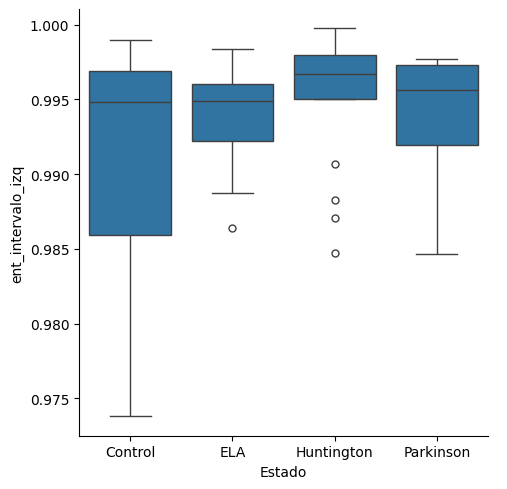

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.125040993548093


<Figure size 640x480 with 0 Axes>

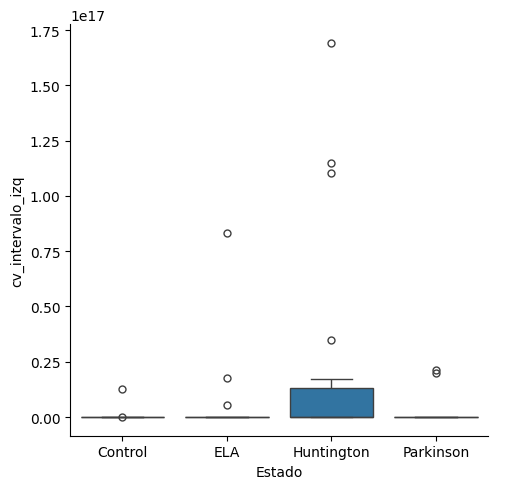

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


6.032843139232345


<Figure size 640x480 with 0 Axes>

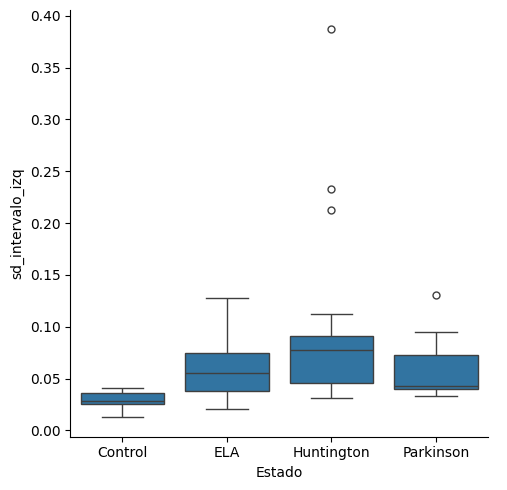

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.583505546958919


<Figure size 640x480 with 0 Axes>

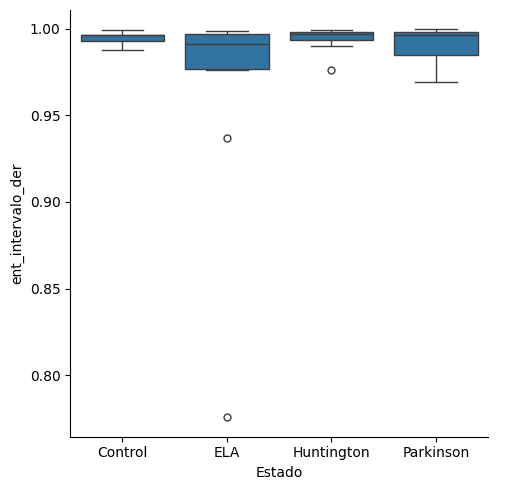

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


6.589776602967363


<Figure size 640x480 with 0 Axes>

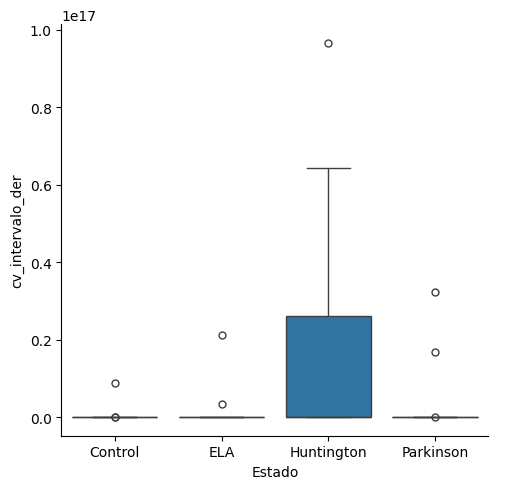

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.784799309581056


<Figure size 640x480 with 0 Axes>

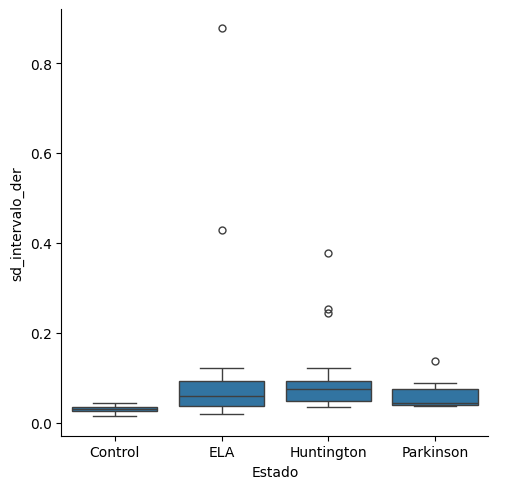

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


4.111537160698539


<Figure size 640x480 with 0 Axes>

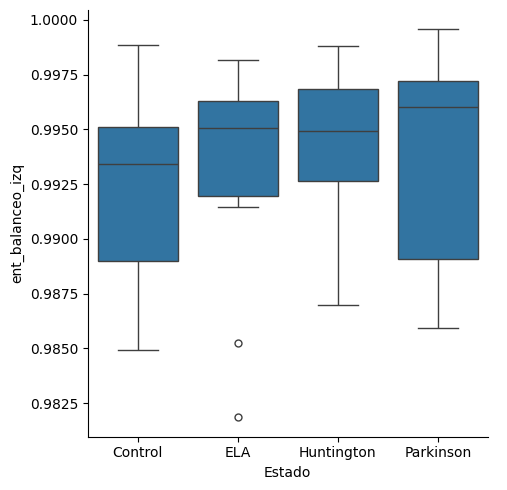

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.694238944758832


<Figure size 640x480 with 0 Axes>

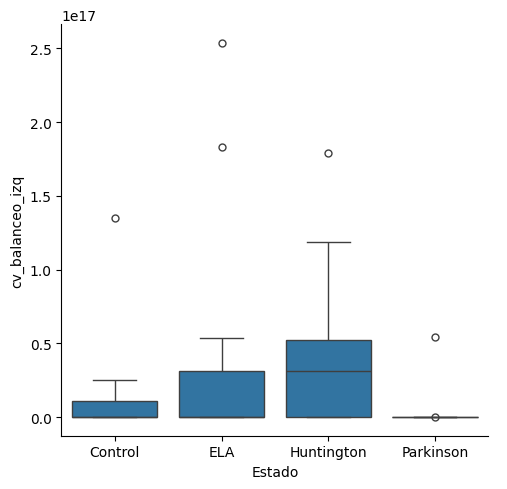

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


5.509438210323934


<Figure size 640x480 with 0 Axes>

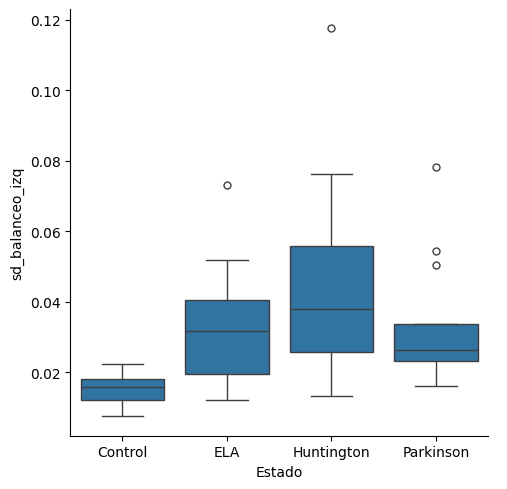

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.469849080400068


<Figure size 640x480 with 0 Axes>

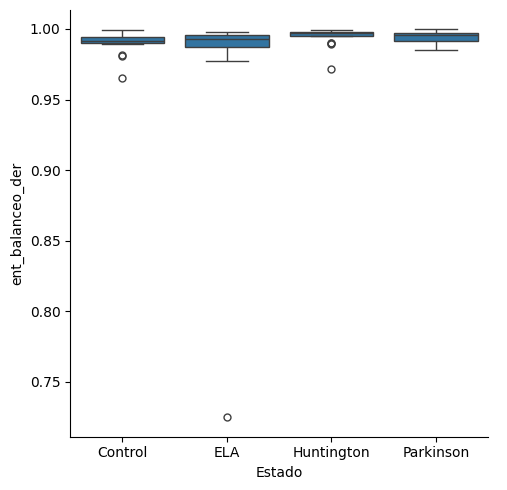

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


7.54546332729808


<Figure size 640x480 with 0 Axes>

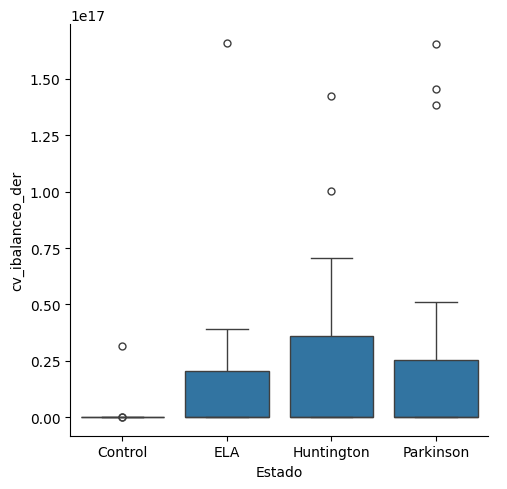

C:\Users\andre\AppData\Local\Temp\ipykernel_17912\1161191027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


6.050483299127303


<Figure size 640x480 with 0 Axes>

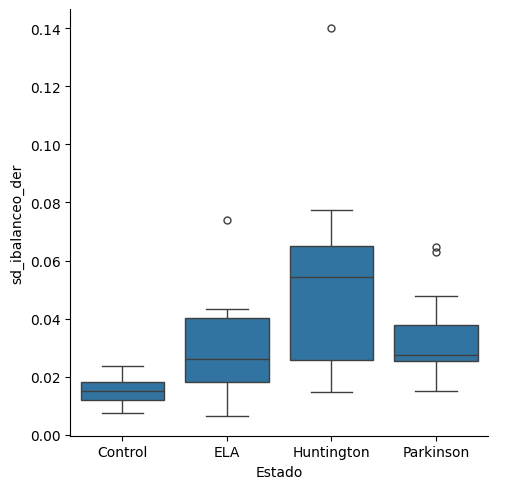

In [60]:
for i,j in enumerate(dfFinal.columns):
    if i <= 1:
        continue
    data = dfFinal[["Estado", j]]
    data[j] = data[j].apply(float)
    zscores = zscore(data[j])
    absScores = np.abs(zscores)
    data = data[absScores <= 3] # Esto elimina los datos atipicos
     
    plt.figure()
    sns.catplot(
    data=data, 
    kind="box", 
    x="Estado", 
    y=j
    )
    plt.show()
    

## **Bibliografía**

[1] La enfermedad de Parkinson: causas, síntomas y tratamientos. (s. f.). National Institute On Aging. https://www.nia.nih.gov/espanol/parkinson/enfermedad-parkinson-causas-sintomas-tratamientos

[2]Enfermedad de Huntington - Síntomas y causas - Mayo Clinic. (2024, 20 agosto). https://www.mayoclinic.org/es/diseases-conditions/huntingtons-disease/symptoms-causes/syc-20356117

[3] Rubin, M. (2024, 6 marzo). Esclerosis lateral amiotrófica (ELA) y otras enfermedades de la neurona motora (ENM). Manual MSD Versión Para Profesionales. https://edgeservices.bing.com/edgesvc/redirect?url=https%3A%2F%2Fwww.msdmanuals.com%2Fes%2Fprofessional%2Ftrastornos-neurol%25C3%25B3gicos%2Fsistema-nervioso-perif%25C3%25A9rico-y-trastornos-de-la-unidad-motora%2Fesclerosis-lateral-amiotr%25C3%25B3fica-ela-y-otras-enfermedades-de-la-neurona-motora-enm&hash=zaMyeR6PsxpJGG6tWb09%2FkTmQWT%2FQRVwad4daxr5FgI%3D&key=psc-underside&usparams=cvid%3A51D%7CBingProd%7C540C3738B351584411D10F2DD6CBC3A9EAE5F65E9CB835B20E0314DB06EA6454%5Ertone%3ABalanced

[4] Filho, M. (2023, 10 marzo). Detrending time series data with Python. Forecastegy. https://forecastegy.com/posts/detrending-time-series-data-python/

[5] Pearson, R. K., Neuvo, Y., Astola, J., & Gabbouj, M. (2016). Generalized Hampel filters. EURASIP Journal On Advances In Signal Processing, 2016(1). https://doi.org/10.1186/s13634-016-0383-6